In [1]:
import torch
import clip
from PIL import Image
import os
import clip
import torch
from torchvision.datasets import CIFAR10
import sklearn
import sklearn.decomposition as decomposition
import sklearn.pipeline as pipeline
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
import numpy as np
import itertools
import matplotlib.pyplot as plt
import json 
import gc
import itertools
#https://github.com/facebookresearch/faiss
#https://nocaps.org/download
#https://cs.stanford.edu/people/mmahoney/cs369m/Lectures/lecture1.pdf
#http://proceedings.mlr.press/v130/liu21b/liu21b.pdf

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
model, preprocess = clip.load("ViT-B/32", device=device)

cuda


In [3]:
with open('datasets/nouns.txt') as f:
    nouns = f.read().splitlines()

with open('datasets/adjectives.txt') as f:
    adj = f.read().splitlines()

In [4]:
nouns_t = clip.tokenize(nouns).to(device)
adj_t = clip.tokenize(adj).to(device)

with torch.no_grad():
    nouns_features_u = model.encode_text(nouns_t)
    adj_features_u = model.encode_text(adj_t)

nouns_features = nouns_features_u / nouns_features_u.norm(dim=-1, keepdim=True)
adj_features = adj_features_u /adj_features_u.norm(dim=-1, keepdim=True)



In [5]:
sim_nouns_nouns = (nouns_features @ nouns_features.T)
sim_adj_adj = (adj_features @ adj_features.T)
print(sim_nouns_nouns)
print(sim_adj_adj)

tensor([[0.9995, 0.9243, 0.9004,  ..., 0.8823, 0.8989, 0.8965],
        [0.9243, 1.0010, 0.9019,  ..., 0.8799, 0.9028, 0.8979],
        [0.9004, 0.9019, 1.0000,  ..., 0.8760, 0.8872, 0.9077],
        ...,
        [0.8823, 0.8799, 0.8760,  ..., 0.9995, 0.8711, 0.9307],
        [0.8989, 0.9028, 0.8872,  ..., 0.8711, 1.0000, 0.8877],
        [0.8965, 0.8979, 0.9077,  ..., 0.9307, 0.8877, 0.9995]],
       device='cuda:0', dtype=torch.float16)
tensor([[0.9995, 0.9692, 0.8745, 0.8979, 0.8203, 0.8154, 0.8184, 0.8037, 0.8853,
         0.8823],
        [0.9692, 1.0000, 0.8853, 0.9028, 0.8218, 0.8198, 0.8135, 0.8115, 0.8940,
         0.8921],
        [0.8745, 0.8853, 1.0000, 0.9194, 0.8115, 0.8115, 0.7368, 0.7944, 0.8931,
         0.8975],
        [0.8979, 0.9028, 0.9194, 1.0000, 0.8262, 0.8179, 0.7593, 0.8062, 0.9023,
         0.8970],
        [0.8203, 0.8218, 0.8115, 0.8262, 1.0000, 0.7949, 0.7505, 0.7905, 0.8247,
         0.8115],
        [0.8154, 0.8198, 0.8115, 0.8179, 0.7949, 1.0010, 0.720

In [6]:
a = adj[0]
a_feature = adj_features[0]

adj_nouns = [a + " " + n for n in nouns]
print(adj_nouns)
adj_nouns_t = clip.tokenize(adj_nouns).to(device)
with torch.no_grad():
    adj_nouns_features = model.encode_text(adj_nouns_t)

comb_a_nouns = nouns_features + a_feature

adj_nouns_features /= adj_nouns_features.norm(dim=-1, keepdim=True)
comb_a_nouns /= comb_a_nouns.norm(dim=-1, keepdim=True)

print(adj_nouns_features)
print(comb_a_nouns)

sim = np.einsum("ij,ij->i", adj_nouns_features.cpu(), comb_a_nouns.cpu())

print(sim)


['new time', 'new year', 'new people', 'new way', 'new day', 'new man', 'new thing', 'new woman', 'new life', 'new child', 'new world', 'new school', 'new state', 'new family', 'new student', 'new group', 'new country', 'new problem', 'new hand', 'new part', 'new place', 'new case', 'new week', 'new company', 'new system', 'new program', 'new question', 'new work', 'new government', 'new number', 'new night', 'new point', 'new home', 'new water', 'new room', 'new mother', 'new area', 'new money', 'new story', 'new fact', 'new month', 'new lot', 'new right', 'new study', 'new book', 'new eye', 'new job', 'new word', 'new business', 'new issue', 'new side', 'new kind', 'new head', 'new house', 'new service', 'new friend', 'new father', 'new power', 'new hour', 'new game', 'new line', 'new end', 'new member', 'new law', 'new car', 'new city', 'new community', 'new name', 'new president', 'new team', 'new minute', 'new idea', 'new kid', 'new body', 'new information', 'new back', 'new paren

['new time', 'old time', 'small time', 'large time', 'black time', 'white time', 'red time', 'blue time', 'close time', 'far time', 'new year', 'old year', 'small year', 'large year', 'black year', 'white year', 'red year', 'blue year', 'close year', 'far year', 'new people', 'old people', 'small people', 'large people', 'black people', 'white people', 'red people', 'blue people', 'close people', 'far people', 'new way', 'old way', 'small way', 'large way', 'black way', 'white way', 'red way', 'blue way', 'close way', 'far way', 'new day', 'old day', 'small day', 'large day', 'black day', 'white day', 'red day', 'blue day', 'close day', 'far day', 'new man', 'old man', 'small man', 'large man', 'black man', 'white man', 'red man', 'blue man', 'close man', 'far man', 'new thing', 'old thing', 'small thing', 'large thing', 'black thing', 'white thing', 'red thing', 'blue thing', 'close thing', 'far thing', 'new woman', 'old woman', 'small woman', 'large woman', 'black woman', 'white woma

torch.Size([1000, 512])
tensor([[ 0.0088, -0.0208, -0.0174,  ..., -0.0217,  0.0272,  0.0144],
        [-0.0120,  0.0118, -0.0238,  ..., -0.0322,  0.0078,  0.0164],
        [-0.0184, -0.0172, -0.0310,  ..., -0.0256,  0.0054,  0.0184],
        ...,
        [ 0.0106, -0.0192, -0.0085,  ..., -0.0072, -0.0071,  0.0386],
        [-0.0041, -0.0019,  0.0210,  ..., -0.0145,  0.0019,  0.0213],
        [-0.0231, -0.0155,  0.0275,  ..., -0.0234,  0.0102,  0.0232]],
       device='cuda:0', dtype=torch.float16)
tensor([[-0.0014,  0.0067, -0.0137,  ..., -0.0424,  0.0167,  0.0114],
        [-0.0046,  0.0077, -0.0163,  ..., -0.0429,  0.0139,  0.0145],
        [-0.0146,  0.0025, -0.0325,  ..., -0.0321, -0.0009,  0.0064],
        ...,
        [ 0.0036, -0.0222,  0.0055,  ..., -0.0193, -0.0075,  0.0262],
        [ 0.0042, -0.0065,  0.0055,  ..., -0.0272, -0.0011,  0.0161],
        [-0.0162, -0.0160,  0.0132,  ..., -0.0186,  0.0104,  0.0213]],
       dtype=torch.float16)
[0.9736 0.9688 0.98   0.9844 0.9634

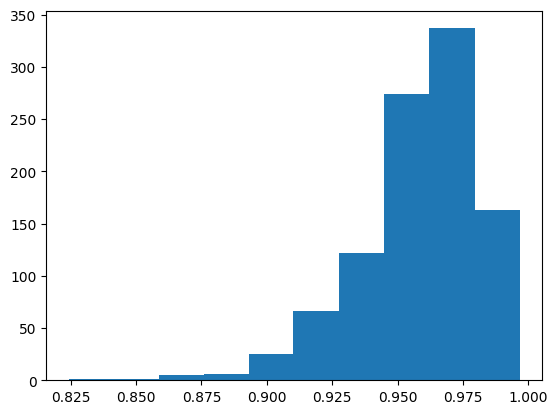

In [20]:
a_feature = adj_features[0]

adj_nouns = [a + " " + n for n, a in itertools.product(nouns, adj)]
print(adj_nouns)
adj_nouns_t = clip.tokenize(adj_nouns).to(device)
print(len(adj_nouns_t))
with torch.no_grad():
    nouns_features = model.encode_text(nouns_t)
    adj_features = model.encode_text(adj_t)
    adj_nouns_features = model.encode_text(adj_nouns_t)

comb_a_nouns = torch.stack([torch.add(n, a) for n, a in itertools.product(nouns_features.cpu(), adj_features.cpu())])

print(comb_a_nouns.shape)
adj_nouns_features /= adj_nouns_features.norm(dim=-1, keepdim=True)
comb_a_nouns /= comb_a_nouns.norm(dim=-1, keepdim=True)

print(adj_nouns_features)
print(comb_a_nouns)

sim = np.einsum("ij,ij->i", adj_nouns_features.cpu(), comb_a_nouns.cpu())

print(sim)

plt.hist(sim)
plt.show()

[[ 0.00277829  0.03214799 -0.0115589  ...  0.00100342 -0.01871468
  -0.01324016]
 [ 0.05533089  0.07614153  0.06875667 ... -0.0729775  -0.00900315
   0.04734875]
 [ 0.0156131  -0.01320409  0.01947085 ...  0.02129485  0.00391467
  -0.02853737]
 ...
 [-0.03704288  0.00412167 -0.07264173 ...  0.0250275  -0.08798505
   0.01965802]
 [ 0.05188282 -0.01058015  0.00224122 ...  0.0019325  -0.00605382
  -0.07952005]
 [ 0.00931138  0.08035759  0.07832452 ...  0.04317991  0.00263616
   0.03380834]]
[1.04303704e-01 5.07432995e-02 3.63827088e-02 3.39722431e-02
 3.09557510e-02 2.80589876e-02 2.53728657e-02 2.27558726e-02
 2.14676860e-02 2.06144423e-02 2.01592163e-02 1.91533531e-02
 1.85022237e-02 1.74854952e-02 1.72165691e-02 1.64045093e-02
 1.55129215e-02 1.50726127e-02 1.43355698e-02 1.36659934e-02
 1.33494390e-02 1.31114444e-02 1.26718495e-02 1.24725153e-02
 1.23323767e-02 1.19965626e-02 1.16201361e-02 1.14380350e-02
 1.10572742e-02 1.05636229e-02 1.04284631e-02 1.01767623e-02
 9.93718599e-03 9.58

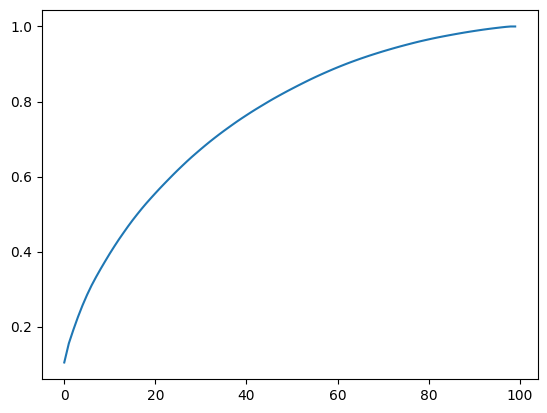

In [19]:
pca = decomposition.PCA()

pca.fit(nouns_features.cpu())

print(pca.components_)
print(pca.explained_variance_ratio_)

plt.plot(np.cumsum(pca.explained_variance_) / np.sum(pca.explained_variance_))

In [9]:
f = open('datasets/nocaps_val_4500_captions.json')
data = json.load(f)
f.close()



In [10]:
import gc
torch.cuda.empty_cache()
gc.collect()

print(torch.cuda.memory_allocated())
print(torch.cuda.max_memory_allocated())

annotations = data['annotations']
captions = [a['caption'] for a in annotations]

capt_t = clip.tokenize(captions[0:len(captions):10]).to(device)
print(len(capt_t))
print(torch.cuda.memory_allocated())
print(torch.cuda.max_memory_allocated())

with torch.no_grad():
    capt_f = model.encode_text(capt_t)


369757184
1630940160
4500
371330048
1630940160


[[-0.00528934 -0.01819444  0.01695146 ... -0.00093066 -0.00264714
  -0.00216645]
 [ 0.00639094  0.02308969 -0.05809199 ... -0.09576493  0.02870449
  -0.00752521]
 [ 0.07037935 -0.04851776  0.0369211  ...  0.07135889  0.00298114
   0.05772628]
 ...
 [ 0.01292186  0.01346024 -0.00029004 ...  0.02237278  0.0147864
  -0.00977676]
 [ 0.03359461  0.03979457 -0.00026732 ...  0.07574337  0.04223726
  -0.02416469]
 [ 0.0018725   0.00411601 -0.01218332 ... -0.03889991 -0.00432411
   0.01312255]]
[9.35578491e-02 4.23543113e-02 2.88782141e-02 2.42658290e-02
 2.06848289e-02 1.96489738e-02 1.78541203e-02 1.64007427e-02
 1.48555022e-02 1.40047437e-02 1.33877314e-02 1.26624250e-02
 1.18405018e-02 1.16402776e-02 1.14400555e-02 1.12804751e-02
 1.10124370e-02 1.09373344e-02 1.01938807e-02 9.82699549e-03
 9.65032260e-03 9.19434166e-03 8.71645097e-03 8.41662529e-03
 8.24460019e-03 7.88859445e-03 7.70159940e-03 7.62441046e-03
 7.51167319e-03 7.27567120e-03 6.97537136e-03 6.78519652e-03
 6.55441141e-03 6.484

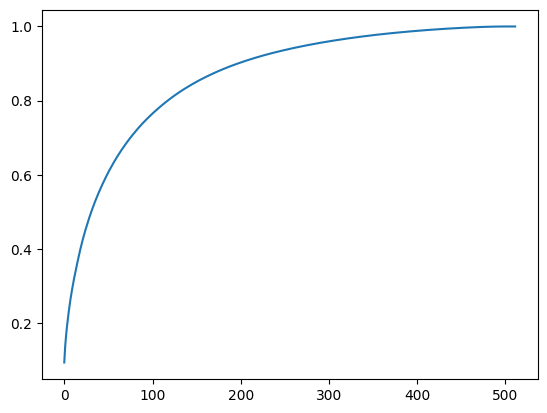

In [16]:
capt_f_n = capt_f / capt_f.norm(dim=-1, keepdim=True)
pca = decomposition.PCA()

pca.fit(capt_f.cpu())

print(pca.components_)
print(pca.explained_variance_ratio_)


plt.plot(np.cumsum(pca.explained_variance_) / np.sum(pca.explained_variance_))

In [12]:
caps = captions[0:len(captions):10]
caps_t = clip.tokenize(caps).to(device)

with torch.no_grad():
    caps_f = model.encode_text(caps_t)

    
    

c:\Anaconda\lib\site-packages\numpy\linalg\linalg.py:2181: RuntimeWarning: overflow encountered in cast
  r = r.astype(result_t, copy=False)


[[ 0.04855347  0.27783203 -0.17797852 ... -0.02046204 -0.1138916
   0.1229248 ]
 [-0.10772705  0.00735092  0.12115479 ...  0.21484375 -0.16516113
  -0.47583008]
 [-0.17004395  0.03851318  0.12255859 ...  0.02598572 -0.1998291
  -0.3017578 ]
 ...
 [-0.26953125 -0.8984375  -0.3659668  ... -0.31030273 -0.38671875
  -0.57470703]
 [-0.10217285 -0.22473145 -0.2692871  ...  0.08270264 -0.2800293
   0.12261963]
 [-0.2163086   0.03277588  0.28515625 ... -0.03216553 -0.02703857
   0.14355469]]
['a helmeted', 'a woman', 'a with', 'a bent', 'a knees', 'a lies', 'a sideways', 'a on', 'a floor', 'a supported', 'a by', 'a arm', 'a in', 'a front', 'a of', 'a another', 'a competitor', 'a her', 'a and', 'a seated', 'a spectators.', 'helmeted a', 'helmeted woman', 'helmeted with', 'helmeted bent', 'helmeted knees', 'helmeted lies', 'helmeted sideways', 'helmeted on', 'helmeted floor', 'helmeted supported', 'helmeted by', 'helmeted arm', 'helmeted in', 'helmeted front', 'helmeted of', 'helmeted another', 

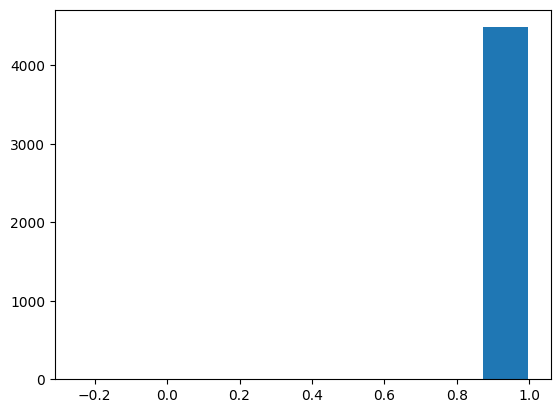

In [13]:
sim = []

for i in range(len(caps)):
    c = caps[i]
    words = c.split()
    w2 = []
    [w2.append(x.lower()) for x in words if x.lower() not in w2]
    w3 = [" ".join(c) for c in itertools.permutations(w2, 2)]
    w4 = []
    [w4.append(x.lower()) for x in w3 if x.lower() not in w4]
    words_t = clip.tokenize(w4 + w2).to(device)

    with torch.no_grad():
        words_f = model.encode_text(words_t)
    
    A = words_f.detach().cpu().numpy().astype('float32').T
    b = caps_f[i].detach().cpu().numpy().reshape((512, 1)).astype('float32')

    if np.linalg.det(A.T @ A) == 0:
        print(A)
        print(w4 + w2)
    p = A @ np.linalg.inv(A.T @ A) @ A.T @ b

    sim.append((b.T @ p / np.linalg.norm(b) / np.linalg.norm(p))[0][0])


sim = [x for x in sim if str(x) != 'nan']
print(sim)
plt.hist(sim)
plt.show()

    



[0.8900444, 0.963472, 0.97292835, 0.95905656, 0.9513117, 0.94296724, 0.9685447, 0.9679454, 0.92633235, 0.9252707, 0.95602006, 0.9649168, 0.96906686, 0.9183638, 0.9466385, 0.954012, 0.9388075, 0.9646614, 0.9613498, 0.9625058, 0.9456638, 0.98119706, 0.95362586, 0.9465539, 0.87935936, 0.9566368, 0.9541396, 0.9563439, 0.9884921, 0.94831055, 0.9595063, 0.95097816, 0.9306029, 0.9733028, 0.93844676, 0.95298386, 0.97253907, 0.9659863, 0.9561767, 0.9297333, 0.8863224, 0.95224714, 0.93991256, 0.96582186, 0.92463267, 0.9586909, 0.9450447, 0.9583313, 0.963454, 0.9645575, 0.9413805, 0.95702446, 0.96335006, 0.93096536, 0.94809645, 0.9537433, 0.9264464, 0.92293996, 0.95533127, 0.9631008, 0.9547841, 0.9122731, 0.95635873, 0.8900068, 0.95640165, 0.97788614, 0.95270395, 0.98380345, 0.9471444, 0.94675666, 0.959225, 0.97105575, 0.9409006, 0.96313, 0.9618663, 0.9641812, 0.9655801, 0.9329925, 0.94232637, 0.97204965, 0.95727044, 0.9271435, 0.9888092, 0.9689512, 0.95666194, 0.94891876, 0.9431124, 0.9587955, 0

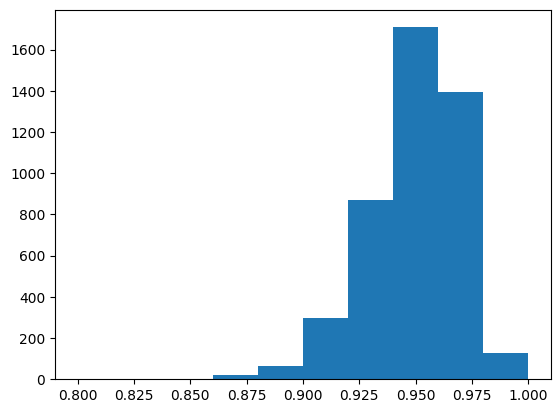

In [15]:
print(sim)
plt.hist(sim, range=(.8, 1), bins=10)
plt.show()

In [4]:
sentences = ["Only one student ran in the race, and Mary did too.", "Only one student ran in the race, who was Mary.", "Only one student ran in the race, and Mary, who was not a student, did too."]

sent = clip.tokenize(sentences).to(device)

with torch.no_grad():
    embeddings = model.encode_text(sent)

In [6]:
print(embeddings)

embeddings = embeddings / embeddings.norm(dim=-1, keepdim=True)
A = embeddings.detach().cpu().numpy().astype('float32').T

print(A.T @ A)

tensor([[ 0.0925,  0.1371, -0.4644,  ...,  0.1070,  0.1764, -0.2142],
        [-0.1265,  0.2312, -0.3213,  ..., -0.0106,  0.0849, -0.1726],
        [ 0.0980,  0.1904, -0.3645,  ...,  0.1504,  0.1594, -0.2147]],
       device='cuda:0', dtype=torch.float16)
[[1.0005668  0.96972555 0.9895243 ]
 [0.96972555 0.9995369  0.96660596]
 [0.9895243  0.96660596 0.9992051 ]]
